In [51]:
import os
from pathlib import Path
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from random import seed

In [52]:
os.chdir("C:\\Users\\R swetha\\Desktop\\DEEP LEARNING")
train_data=pd.read_csv("train.csv") 
train_data.shape

(42000, 785)

In [53]:
x=train_data.drop("label",axis=1)
y=np.array(train_data['label'])
x.shape,y.shape

((42000, 784), (42000,))

In [54]:
import torch 
random_seed = 0
torch.manual_seed(random_seed)

In [55]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

len of trainSet 33600 , len of testSet 8400


In [6]:
import random
random.seed(0)

### Model 1: 1 hidden layer

In [56]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64,32)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
       
        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model=Network()
print("No of parameters",sum([p.numel() for p in model.parameters()]))

No of parameters 52320


#### Optimizer : Adam

In [7]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.407..  Test Loss: 0.338..  Test Accuracy: 0.908
Epoch: 2/10..  Training Loss: 0.320..  Test Loss: 0.379..  Test Accuracy: 0.921
Epoch: 3/10..  Training Loss: 0.298..  Test Loss: 0.347..  Test Accuracy: 0.921
Epoch: 4/10..  Training Loss: 0.289..  Test Loss: 0.406..  Test Accuracy: 0.915
Epoch: 5/10..  Training Loss: 0.295..  Test Loss: 0.397..  Test Accuracy: 0.914
Epoch: 6/10..  Training Loss: 0.278..  Test Loss: 0.411..  Test Accuracy: 0.921
Epoch: 7/10..  Training Loss: 0.287..  Test Loss: 0.408..  Test Accuracy: 0.925
Epoch: 8/10..  Training Loss: 0.260..  Test Loss: 0.373..  Test Accuracy: 0.928
Epoch: 9/10..  Training Loss: 0.253..  Test Loss: 0.473..  Test Accuracy: 0.915
Epoch: 10/10..  Training Loss: 0.257..  Test Loss: 0.421..  Test Accuracy: 0.924


In [15]:
optimizer=optim.Adam(model.parameters(),lr=0.1)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 1.017..  Test Loss: 1.060..  Test Accuracy: 0.696
Epoch: 2/10..  Training Loss: 0.929..  Test Loss: 1.075..  Test Accuracy: 0.700
Epoch: 3/10..  Training Loss: 0.935..  Test Loss: 1.002..  Test Accuracy: 0.704
Epoch: 4/10..  Training Loss: 0.968..  Test Loss: 0.998..  Test Accuracy: 0.657
Epoch: 5/10..  Training Loss: 0.954..  Test Loss: 1.056..  Test Accuracy: 0.641
Epoch: 6/10..  Training Loss: 0.958..  Test Loss: 1.002..  Test Accuracy: 0.705
Epoch: 7/10..  Training Loss: 1.052..  Test Loss: 1.267..  Test Accuracy: 0.602
Epoch: 8/10..  Training Loss: 1.063..  Test Loss: 1.148..  Test Accuracy: 0.693
Epoch: 9/10..  Training Loss: 0.984..  Test Loss: 1.261..  Test Accuracy: 0.652
Epoch: 10/10..  Training Loss: 0.992..  Test Loss: 1.319..  Test Accuracy: 0.676


In [16]:
optimizer=optim.Adam(model.parameters(),lr=0.06)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.943..  Test Loss: 1.406..  Test Accuracy: 0.661
Epoch: 2/10..  Training Loss: 0.847..  Test Loss: 1.068..  Test Accuracy: 0.708
Epoch: 3/10..  Training Loss: 0.826..  Test Loss: 1.099..  Test Accuracy: 0.723
Epoch: 4/10..  Training Loss: 0.790..  Test Loss: 1.031..  Test Accuracy: 0.715
Epoch: 5/10..  Training Loss: 0.820..  Test Loss: 1.102..  Test Accuracy: 0.685
Epoch: 6/10..  Training Loss: 0.805..  Test Loss: 1.034..  Test Accuracy: 0.715
Epoch: 7/10..  Training Loss: 0.766..  Test Loss: 1.150..  Test Accuracy: 0.736
Epoch: 8/10..  Training Loss: 0.788..  Test Loss: 1.057..  Test Accuracy: 0.726
Epoch: 9/10..  Training Loss: 0.787..  Test Loss: 1.034..  Test Accuracy: 0.724
Epoch: 10/10..  Training Loss: 0.759..  Test Loss: 1.100..  Test Accuracy: 0.730


OBservation : lr =0.04 gave the best accuracy

#### SGD with lr and momentum with different learning rates

Epoch: 1/10..  Training Loss: 0.435..  Test Loss: 0.237..  Test Accuracy: 0.927
Epoch: 2/10..  Training Loss: 0.178..  Test Loss: 0.173..  Test Accuracy: 0.950
Epoch: 3/10..  Training Loss: 0.128..  Test Loss: 0.146..  Test Accuracy: 0.956
Epoch: 4/10..  Training Loss: 0.101..  Test Loss: 0.136..  Test Accuracy: 0.960
Epoch: 5/10..  Training Loss: 0.088..  Test Loss: 0.146..  Test Accuracy: 0.957
Epoch: 6/10..  Training Loss: 0.071..  Test Loss: 0.156..  Test Accuracy: 0.955
Epoch: 7/10..  Training Loss: 0.063..  Test Loss: 0.140..  Test Accuracy: 0.961
Epoch: 8/10..  Training Loss: 0.052..  Test Loss: 0.126..  Test Accuracy: 0.964
Epoch: 9/10..  Training Loss: 0.045..  Test Loss: 0.122..  Test Accuracy: 0.963
Epoch: 10/10..  Training Loss: 0.041..  Test Loss: 0.143..  Test Accuracy: 0.962


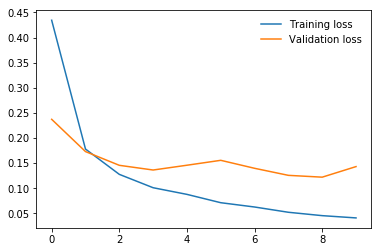

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [11]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.375..  Test Loss: 0.203..  Test Accuracy: 0.939
Epoch: 2/10..  Training Loss: 0.158..  Test Loss: 0.183..  Test Accuracy: 0.946
Epoch: 3/10..  Training Loss: 0.125..  Test Loss: 0.148..  Test Accuracy: 0.956
Epoch: 4/10..  Training Loss: 0.103..  Test Loss: 0.153..  Test Accuracy: 0.957
Epoch: 5/10..  Training Loss: 0.093..  Test Loss: 0.156..  Test Accuracy: 0.958
Epoch: 6/10..  Training Loss: 0.081..  Test Loss: 0.175..  Test Accuracy: 0.955
Epoch: 7/10..  Training Loss: 0.069..  Test Loss: 0.172..  Test Accuracy: 0.961
Epoch: 8/10..  Training Loss: 0.058..  Test Loss: 0.161..  Test Accuracy: 0.962
Epoch: 9/10..  Training Loss: 0.056..  Test Loss: 0.175..  Test Accuracy: 0.964
Epoch: 10/10..  Training Loss: 0.053..  Test Loss: 0.185..  Test Accuracy: 0.960


Epoch: 1/10..  Training Loss: 0.822..  Test Loss: 0.395..  Test Accuracy: 0.889
Epoch: 2/10..  Training Loss: 0.346..  Test Loss: 0.326..  Test Accuracy: 0.910
Epoch: 3/10..  Training Loss: 0.300..  Test Loss: 0.295..  Test Accuracy: 0.918
Epoch: 4/10..  Training Loss: 0.271..  Test Loss: 0.270..  Test Accuracy: 0.924
Epoch: 5/10..  Training Loss: 0.247..  Test Loss: 0.255..  Test Accuracy: 0.925
Epoch: 6/10..  Training Loss: 0.227..  Test Loss: 0.254..  Test Accuracy: 0.926
Epoch: 7/10..  Training Loss: 0.209..  Test Loss: 0.228..  Test Accuracy: 0.936
Epoch: 8/10..  Training Loss: 0.195..  Test Loss: 0.220..  Test Accuracy: 0.936
Epoch: 9/10..  Training Loss: 0.181..  Test Loss: 0.206..  Test Accuracy: 0.941
Epoch: 10/10..  Training Loss: 0.169..  Test Loss: 0.201..  Test Accuracy: 0.941


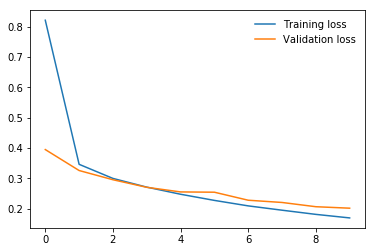

In [57]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.2)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

##### Observation : momentum = 0.9 gave best accuracy

In [9]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion=nn.NLLLoss()
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/5..  Training Loss: 0.666..  Test Loss: 0.342..  Test Accuracy: 0.900
Epoch: 2/5..  Training Loss: 0.297..  Test Loss: 0.282..  Test Accuracy: 0.923
Epoch: 3/5..  Training Loss: 0.248..  Test Loss: 0.247..  Test Accuracy: 0.927
Epoch: 4/5..  Training Loss: 0.210..  Test Loss: 0.219..  Test Accuracy: 0.937
Epoch: 5/5..  Training Loss: 0.183..  Test Loss: 0.204..  Test Accuracy: 0.941


In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.666..  Test Loss: 0.342..  Test Accuracy: 0.900
Epoch: 2/10..  Training Loss: 0.297..  Test Loss: 0.282..  Test Accuracy: 0.923
Epoch: 3/10..  Training Loss: 0.248..  Test Loss: 0.247..  Test Accuracy: 0.927
Epoch: 4/10..  Training Loss: 0.210..  Test Loss: 0.219..  Test Accuracy: 0.937
Epoch: 5/10..  Training Loss: 0.183..  Test Loss: 0.204..  Test Accuracy: 0.941
Epoch: 6/10..  Training Loss: 0.161..  Test Loss: 0.200..  Test Accuracy: 0.941
Epoch: 7/10..  Training Loss: 0.143..  Test Loss: 0.174..  Test Accuracy: 0.950
Epoch: 8/10..  Training Loss: 0.129..  Test Loss: 0.161..  Test Accuracy: 0.953
Epoch: 9/10..  Training Loss: 0.117..  Test Loss: 0.157..  Test Accuracy: 0.955
Epoch: 10/10..  Training Loss: 0.108..  Test Loss: 0.158..  Test Accuracy: 0.951


In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.4, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 1.484..  Test Loss: 0.673..  Test Accuracy: 0.843
Epoch: 2/10..  Training Loss: 0.526..  Test Loss: 0.446..  Test Accuracy: 0.881
Epoch: 3/10..  Training Loss: 0.405..  Test Loss: 0.382..  Test Accuracy: 0.895
Epoch: 4/10..  Training Loss: 0.361..  Test Loss: 0.351..  Test Accuracy: 0.903
Epoch: 5/10..  Training Loss: 0.336..  Test Loss: 0.334..  Test Accuracy: 0.904
Epoch: 6/10..  Training Loss: 0.318..  Test Loss: 0.325..  Test Accuracy: 0.906
Epoch: 7/10..  Training Loss: 0.304..  Test Loss: 0.309..  Test Accuracy: 0.912
Epoch: 8/10..  Training Loss: 0.293..  Test Loss: 0.303..  Test Accuracy: 0.915
Epoch: 9/10..  Training Loss: 0.283..  Test Loss: 0.293..  Test Accuracy: 0.915
Epoch: 10/10..  Training Loss: 0.274..  Test Loss: 0.289..  Test Accuracy: 0.917


Best Accuracy : 96.2,
No of parameters 52320

### Model 2

In [17]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,12)
        self.fc2 = nn.Linear(12,10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
       
    

        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model=Network()
print("No of parameters",sum([p.numel() for p in model.parameters()]))


No of parameters 9550


#### ADAM

In [7]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 0.543..  Test Loss: 0.413..  Test Accuracy: 0.891
Epoch: 2/10..  Training Loss: 0.407..  Test Loss: 0.491..  Test Accuracy: 0.875
Epoch: 3/10..  Training Loss: 0.404..  Test Loss: 0.395..  Test Accuracy: 0.889
Epoch: 4/10..  Training Loss: 0.384..  Test Loss: 0.474..  Test Accuracy: 0.880
Epoch: 5/10..  Training Loss: 0.400..  Test Loss: 0.420..  Test Accuracy: 0.883
Epoch: 6/10..  Training Loss: 0.374..  Test Loss: 0.542..  Test Accuracy: 0.865
Epoch: 7/10..  Training Loss: 0.378..  Test Loss: 0.500..  Test Accuracy: 0.879
Epoch: 8/10..  Training Loss: 0.365..  Test Loss: 0.415..  Test Accuracy: 0.893
Epoch: 9/10..  Training Loss: 0.364..  Test Loss: 0.463..  Test Accuracy: 0.884
Epoch: 10/10..  Training Loss: 0.363..  Test Loss: 0.438..  Test Accuracy: 0.890


In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.883..  Test Loss: 0.448..  Test Accuracy: 0.876
Epoch: 2/10..  Training Loss: 0.390..  Test Loss: 0.361..  Test Accuracy: 0.897
Epoch: 3/10..  Training Loss: 0.334..  Test Loss: 0.331..  Test Accuracy: 0.906
Epoch: 4/10..  Training Loss: 0.309..  Test Loss: 0.318..  Test Accuracy: 0.909
Epoch: 5/10..  Training Loss: 0.292..  Test Loss: 0.302..  Test Accuracy: 0.912
Epoch: 6/10..  Training Loss: 0.280..  Test Loss: 0.297..  Test Accuracy: 0.917
Epoch: 7/10..  Training Loss: 0.271..  Test Loss: 0.286..  Test Accuracy: 0.919
Epoch: 8/10..  Training Loss: 0.263..  Test Loss: 0.281..  Test Accuracy: 0.919
Epoch: 9/10..  Training Loss: 0.256..  Test Loss: 0.280..  Test Accuracy: 0.919
Epoch: 10/10..  Training Loss: 0.249..  Test Loss: 0.270..  Test Accuracy: 0.922


#### SGD with different lr and momentum values

In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.6, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.463..  Test Loss: 0.302..  Test Accuracy: 0.913
Epoch: 2/10..  Training Loss: 0.290..  Test Loss: 0.286..  Test Accuracy: 0.917
Epoch: 3/10..  Training Loss: 0.254..  Test Loss: 0.267..  Test Accuracy: 0.923
Epoch: 4/10..  Training Loss: 0.235..  Test Loss: 0.276..  Test Accuracy: 0.919
Epoch: 5/10..  Training Loss: 0.221..  Test Loss: 0.266..  Test Accuracy: 0.921
Epoch: 6/10..  Training Loss: 0.210..  Test Loss: 0.253..  Test Accuracy: 0.930
Epoch: 7/10..  Training Loss: 0.200..  Test Loss: 0.237..  Test Accuracy: 0.932
Epoch: 8/10..  Training Loss: 0.194..  Test Loss: 0.240..  Test Accuracy: 0.931
Epoch: 9/10..  Training Loss: 0.186..  Test Loss: 0.257..  Test Accuracy: 0.923
Epoch: 10/10..  Training Loss: 0.182..  Test Loss: 0.240..  Test Accuracy: 0.931


In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.429..  Test Loss: 0.315..  Test Accuracy: 0.909
Epoch: 2/10..  Training Loss: 0.307..  Test Loss: 0.334..  Test Accuracy: 0.903
Epoch: 3/10..  Training Loss: 0.291..  Test Loss: 0.325..  Test Accuracy: 0.908
Epoch: 4/10..  Training Loss: 0.279..  Test Loss: 0.353..  Test Accuracy: 0.902
Epoch: 5/10..  Training Loss: 0.270..  Test Loss: 0.305..  Test Accuracy: 0.918
Epoch: 6/10..  Training Loss: 0.260..  Test Loss: 0.342..  Test Accuracy: 0.914
Epoch: 7/10..  Training Loss: 0.251..  Test Loss: 0.300..  Test Accuracy: 0.925
Epoch: 8/10..  Training Loss: 0.251..  Test Loss: 0.315..  Test Accuracy: 0.916
Epoch: 9/10..  Training Loss: 0.244..  Test Loss: 0.348..  Test Accuracy: 0.912
Epoch: 10/10..  Training Loss: 0.246..  Test Loss: 0.308..  Test Accuracy: 0.919


In [18]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.634..  Test Loss: 0.332..  Test Accuracy: 0.908
Epoch: 2/10..  Training Loss: 0.302..  Test Loss: 0.300..  Test Accuracy: 0.913
Epoch: 3/10..  Training Loss: 0.273..  Test Loss: 0.277..  Test Accuracy: 0.921
Epoch: 4/10..  Training Loss: 0.253..  Test Loss: 0.265..  Test Accuracy: 0.926
Epoch: 5/10..  Training Loss: 0.241..  Test Loss: 0.256..  Test Accuracy: 0.927
Epoch: 6/10..  Training Loss: 0.228..  Test Loss: 0.256..  Test Accuracy: 0.927
Epoch: 7/10..  Training Loss: 0.221..  Test Loss: 0.257..  Test Accuracy: 0.927
Epoch: 8/10..  Training Loss: 0.212..  Test Loss: 0.246..  Test Accuracy: 0.930
Epoch: 9/10..  Training Loss: 0.206..  Test Loss: 0.240..  Test Accuracy: 0.931
Epoch: 10/10..  Training Loss: 0.200..  Test Loss: 0.237..  Test Accuracy: 0.933


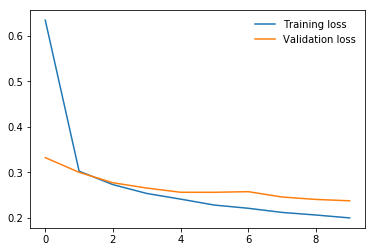

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [10]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/5..  Training Loss: 0.640..  Test Loss: 0.344..  Test Accuracy: 0.901
Epoch: 2/5..  Training Loss: 0.317..  Test Loss: 0.308..  Test Accuracy: 0.913
Epoch: 3/5..  Training Loss: 0.285..  Test Loss: 0.295..  Test Accuracy: 0.915
Epoch: 4/5..  Training Loss: 0.264..  Test Loss: 0.286..  Test Accuracy: 0.917
Epoch: 5/5..  Training Loss: 0.250..  Test Loss: 0.274..  Test Accuracy: 0.920


In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   

Epoch: 1/10..  Training Loss: 0.444..  Test Loss: 0.297..  Test Accuracy: 0.916
Epoch: 2/10..  Training Loss: 0.273..  Test Loss: 0.291..  Test Accuracy: 0.915
Epoch: 3/10..  Training Loss: 0.241..  Test Loss: 0.276..  Test Accuracy: 0.916
Epoch: 4/10..  Training Loss: 0.222..  Test Loss: 0.268..  Test Accuracy: 0.920
Epoch: 5/10..  Training Loss: 0.210..  Test Loss: 0.234..  Test Accuracy: 0.932
Epoch: 6/10..  Training Loss: 0.198..  Test Loss: 0.256..  Test Accuracy: 0.930
Epoch: 7/10..  Training Loss: 0.191..  Test Loss: 0.235..  Test Accuracy: 0.935
Epoch: 8/10..  Training Loss: 0.184..  Test Loss: 0.232..  Test Accuracy: 0.934
Epoch: 9/10..  Training Loss: 0.180..  Test Loss: 0.272..  Test Accuracy: 0.921
Epoch: 10/10..  Training Loss: 0.179..  Test Loss: 0.246..  Test Accuracy: 0.931


Best accuracy : 93.2,No of parameters 9550

# Model 3

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,32)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
    

        # output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
        
model=Network()
print("No off parameters",sum([p.numel() for p in model.parameters()]))


No off parameters 110816


In [7]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([128, 784])
fc1.bias 	 torch.Size([128])
fc2.weight 	 torch.Size([64, 128])
fc2.bias 	 torch.Size([64])
fc3.weight 	 torch.Size([32, 64])
fc3.bias 	 torch.Size([32])


### Optimizer: Adam

In [12]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()

In [13]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.461..  Test Loss: 0.388..  Test Accuracy: 0.906
Epoch: 2/10..  Training Loss: 0.346..  Test Loss: 0.385..  Test Accuracy: 0.891
Epoch: 3/10..  Training Loss: 0.326..  Test Loss: 0.354..  Test Accuracy: 0.911
Epoch: 4/10..  Training Loss: 0.306..  Test Loss: 0.361..  Test Accuracy: 0.918
Epoch: 5/10..  Training Loss: 0.300..  Test Loss: 0.356..  Test Accuracy: 0.915
Epoch: 6/10..  Training Loss: 0.283..  Test Loss: 0.415..  Test Accuracy: 0.918
Epoch: 7/10..  Training Loss: 0.281..  Test Loss: 0.365..  Test Accuracy: 0.917
Epoch: 8/10..  Training Loss: 0.279..  Test Loss: 0.339..  Test Accuracy: 0.928
Epoch: 9/10..  Training Loss: 0.292..  Test Loss: 0.375..  Test Accuracy: 0.913
Epoch: 10/10..  Training Loss: 0.292..  Test Loss: 0.413..  Test Accuracy: 0.914


In [12]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()

In [10]:
running_loss

147.7696137651801

### Optimizer : SGD with momemtum

Epoch: 1/10..  Training Loss: 0.468..  Test Loss: 0.187..  Test Accuracy: 0.946
Epoch: 2/10..  Training Loss: 0.143..  Test Loss: 0.137..  Test Accuracy: 0.960
Epoch: 3/10..  Training Loss: 0.097..  Test Loss: 0.121..  Test Accuracy: 0.962
Epoch: 4/10..  Training Loss: 0.074..  Test Loss: 0.137..  Test Accuracy: 0.960
Epoch: 5/10..  Training Loss: 0.056..  Test Loss: 0.113..  Test Accuracy: 0.968
Epoch: 6/10..  Training Loss: 0.045..  Test Loss: 0.112..  Test Accuracy: 0.969
Epoch: 7/10..  Training Loss: 0.038..  Test Loss: 0.127..  Test Accuracy: 0.968
Epoch: 8/10..  Training Loss: 0.030..  Test Loss: 0.131..  Test Accuracy: 0.969
Epoch: 9/10..  Training Loss: 0.024..  Test Loss: 0.111..  Test Accuracy: 0.973
Epoch: 10/10..  Training Loss: 0.017..  Test Loss: 0.120..  Test Accuracy: 0.973


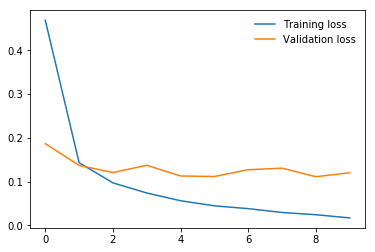

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))   
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### SGD without momentum

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 1/10..  Training Loss: 1.176..  Test Loss: 0.451..  Test Accuracy: 0.872
Epoch: 2/10..  Training Loss: 0.374..  Test Loss: 0.330..  Test Accuracy: 0.905
Epoch: 3/10..  Training Loss: 0.301..  Test Loss: 0.288..  Test Accuracy: 0.917
Epoch: 4/10..  Training Loss: 0.260..  Test Loss: 0.258..  Test Accuracy: 0.925
Epoch: 5/10..  Training Loss: 0.226..  Test Loss: 0.222..  Test Accuracy: 0.933
Epoch: 6/10..  Training Loss: 0.199..  Test Loss: 0.213..  Test Accuracy: 0.935
Epoch: 7/10..  Training Loss: 0.177..  Test Loss: 0.189..  Test Accuracy: 0.945
Epoch: 8/10..  Training Loss: 0.158..  Test Loss: 0.176..  Test Accuracy: 0.948
Epoch: 9/10..  Training Loss: 0.143..  Test Loss: 0.164..  Test Accuracy: 0.951
Epoch: 10/10..  Training Loss: 0.128..  Test Loss: 0.152..  Test Accuracy: 0.955


### SGD with nesterov = true and momentum

In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.4, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 1/10..  Training Loss: 1.945..  Test Loss: 0.832..  Test Accuracy: 0.780
Epoch: 2/10..  Training Loss: 0.601..  Test Loss: 0.473..  Test Accuracy: 0.865
Epoch: 3/10..  Training Loss: 0.422..  Test Loss: 0.397..  Test Accuracy: 0.881
Epoch: 4/10..  Training Loss: 0.363..  Test Loss: 0.357..  Test Accuracy: 0.897
Epoch: 5/10..  Training Loss: 0.332..  Test Loss: 0.329..  Test Accuracy: 0.905
Epoch: 6/10..  Training Loss: 0.309..  Test Loss: 0.312..  Test Accuracy: 0.909
Epoch: 7/10..  Training Loss: 0.291..  Test Loss: 0.301..  Test Accuracy: 0.913
Epoch: 8/10..  Training Loss: 0.274..  Test Loss: 0.286..  Test Accuracy: 0.918
Epoch: 9/10..  Training Loss: 0.258..  Test Loss: 0.269..  Test Accuracy: 0.924
Epoch: 10/10..  Training Loss: 0.243..  Test Loss: 0.263..  Test Accuracy: 0.924


In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.4, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 1/10..  Training Loss: 0.574..  Test Loss: 0.249..  Test Accuracy: 0.927
Epoch: 2/10..  Training Loss: 0.200..  Test Loss: 0.184..  Test Accuracy: 0.943
Epoch: 3/10..  Training Loss: 0.134..  Test Loss: 0.155..  Test Accuracy: 0.955
Epoch: 4/10..  Training Loss: 0.099..  Test Loss: 0.140..  Test Accuracy: 0.957
Epoch: 5/10..  Training Loss: 0.080..  Test Loss: 0.114..  Test Accuracy: 0.967
Epoch: 6/10..  Training Loss: 0.066..  Test Loss: 0.122..  Test Accuracy: 0.964
Epoch: 7/10..  Training Loss: 0.054..  Test Loss: 0.117..  Test Accuracy: 0.967
Epoch: 8/10..  Training Loss: 0.044..  Test Loss: 0.100..  Test Accuracy: 0.972
Epoch: 9/10..  Training Loss: 0.036..  Test Loss: 0.102..  Test Accuracy: 0.971
Epoch: 10/10..  Training Loss: 0.029..  Test Loss: 0.106..  Test Accuracy: 0.971


In [9]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())
torch.save(model.state_dict(), 'checkpoint.pth')

Our model: 

 Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


Observation :
Best Accuracy : 97.3,
No off parameters 110816

#### Model 4

In [33]:
 class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,10)
                           
        # Dropout module with 0.2 drop probability
        #self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
print("No off parameters",sum([p.numel() for p in model.parameters()]))

No off parameters 111146


### SGD with momentum and nestrov

In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 0/10..  Training Loss: 0.430..  Test Loss: 0.214..  Test Accuracy: 0.938
Epoch: 1/10..  Training Loss: 0.163..  Test Loss: 0.158..  Test Accuracy: 0.956
Epoch: 2/10..  Training Loss: 0.120..  Test Loss: 0.149..  Test Accuracy: 0.959
Epoch: 3/10..  Training Loss: 0.099..  Test Loss: 0.129..  Test Accuracy: 0.967
Epoch: 4/10..  Training Loss: 0.086..  Test Loss: 0.140..  Test Accuracy: 0.965
Epoch: 5/10..  Training Loss: 0.073..  Test Loss: 0.130..  Test Accuracy: 0.970
Epoch: 6/10..  Training Loss: 0.065..  Test Loss: 0.142..  Test Accuracy: 0.967
Epoch: 7/10..  Training Loss: 0.061..  Test Loss: 0.149..  Test Accuracy: 0.967
Epoch: 8/10..  Training Loss: 0.053..  Test Loss: 0.172..  Test Accuracy: 0.966
Epoch: 9/10..  Training Loss: 0.047..  Test Loss: 0.145..  Test Accuracy: 0.966


In [9]:
optimizer = optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 0/10..  Training Loss: 1.863..  Test Loss: 0.808..  Test Accuracy: 0.738
Epoch: 1/10..  Training Loss: 0.528..  Test Loss: 0.389..  Test Accuracy: 0.888
Epoch: 2/10..  Training Loss: 0.345..  Test Loss: 0.342..  Test Accuracy: 0.895
Epoch: 3/10..  Training Loss: 0.262..  Test Loss: 0.242..  Test Accuracy: 0.929
Epoch: 4/10..  Training Loss: 0.211..  Test Loss: 0.220..  Test Accuracy: 0.934
Epoch: 5/10..  Training Loss: 0.176..  Test Loss: 0.180..  Test Accuracy: 0.946
Epoch: 6/10..  Training Loss: 0.150..  Test Loss: 0.168..  Test Accuracy: 0.950
Epoch: 7/10..  Training Loss: 0.129..  Test Loss: 0.151..  Test Accuracy: 0.957
Epoch: 8/10..  Training Loss: 0.112..  Test Loss: 0.146..  Test Accuracy: 0.957
Epoch: 9/10..  Training Loss: 0.099..  Test Loss: 0.150..  Test Accuracy: 0.956


In [11]:
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/10..  Training Loss: 0.177..  Test Loss: 0.152..  Test Accuracy: 0.959
Epoch: 1/10..  Training Loss: 0.121..  Test Loss: 0.200..  Test Accuracy: 0.954
Epoch: 2/10..  Training Loss: 0.114..  Test Loss: 0.143..  Test Accuracy: 0.964
Epoch: 3/10..  Training Loss: 0.112..  Test Loss: 0.166..  Test Accuracy: 0.962
Epoch: 4/10..  Training Loss: 0.086..  Test Loss: 0.156..  Test Accuracy: 0.963
Epoch: 5/10..  Training Loss: 0.081..  Test Loss: 0.167..  Test Accuracy: 0.966
Epoch: 6/10..  Training Loss: 0.084..  Test Loss: 0.198..  Test Accuracy: 0.961
Epoch: 7/10..  Training Loss: 0.091..  Test Loss: 0.205..  Test Accuracy: 0.961
Epoch: 8/10..  Training Loss: 0.077..  Test Loss: 0.150..  Test Accuracy: 0.967
Epoch: 9/10..  Training Loss: 0.058..  Test Loss: 0.183..  Test Accuracy: 0.964


Epoch: 1/10..  Training Loss: 0.976..  Test Loss: 0.356..  Test Accuracy: 0.893
Epoch: 2/10..  Training Loss: 0.271..  Test Loss: 0.226..  Test Accuracy: 0.931
Epoch: 3/10..  Training Loss: 0.177..  Test Loss: 0.182..  Test Accuracy: 0.942
Epoch: 4/10..  Training Loss: 0.131..  Test Loss: 0.152..  Test Accuracy: 0.953
Epoch: 5/10..  Training Loss: 0.106..  Test Loss: 0.135..  Test Accuracy: 0.960
Epoch: 6/10..  Training Loss: 0.085..  Test Loss: 0.124..  Test Accuracy: 0.965
Epoch: 7/10..  Training Loss: 0.070..  Test Loss: 0.122..  Test Accuracy: 0.965
Epoch: 8/10..  Training Loss: 0.058..  Test Loss: 0.120..  Test Accuracy: 0.965
Epoch: 9/10..  Training Loss: 0.048..  Test Loss: 0.118..  Test Accuracy: 0.964
Epoch: 10/10..  Training Loss: 0.039..  Test Loss: 0.110..  Test Accuracy: 0.969


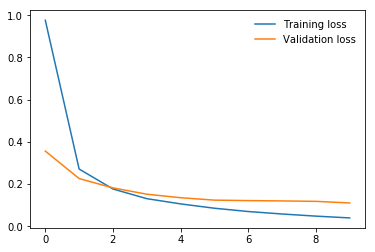

In [34]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

Accuracy : 96.9
No off parameters 111146

### Model 5

In [41]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,16)
        self.fc2 = nn.Linear(16,10)
        
                           
        # Dropout module with 0.2 drop probability
        #self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
       
        

        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model=Network()
print("No off parameters",sum([p.numel() for p in model.parameters()]))

No off parameters 12730


### ADAM

In [9]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.362..  Test Loss: 0.294..  Test Accuracy: 0.917
Epoch: 2/10..  Training Loss: 0.306..  Test Loss: 0.365..  Test Accuracy: 0.914
Epoch: 3/10..  Training Loss: 0.299..  Test Loss: 0.334..  Test Accuracy: 0.916
Epoch: 4/10..  Training Loss: 0.306..  Test Loss: 0.343..  Test Accuracy: 0.915
Epoch: 5/10..  Training Loss: 0.305..  Test Loss: 0.360..  Test Accuracy: 0.914
Epoch: 6/10..  Training Loss: 0.304..  Test Loss: 0.387..  Test Accuracy: 0.911
Epoch: 7/10..  Training Loss: 0.300..  Test Loss: 0.370..  Test Accuracy: 0.912
Epoch: 8/10..  Training Loss: 0.296..  Test Loss: 0.441..  Test Accuracy: 0.911
Epoch: 9/10..  Training Loss: 0.301..  Test Loss: 0.383..  Test Accuracy: 0.918
Epoch: 10/10..  Training Loss: 0.285..  Test Loss: 0.442..  Test Accuracy: 0.914


In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 0/10..  Training Loss: 0.258..  Test Loss: 0.269..  Test Accuracy: 0.924
Epoch: 1/10..  Training Loss: 0.215..  Test Loss: 0.273..  Test Accuracy: 0.922
Epoch: 2/10..  Training Loss: 0.198..  Test Loss: 0.230..  Test Accuracy: 0.934
Epoch: 3/10..  Training Loss: 0.184..  Test Loss: 0.249..  Test Accuracy: 0.928
Epoch: 4/10..  Training Loss: 0.168..  Test Loss: 0.227..  Test Accuracy: 0.936
Epoch: 5/10..  Training Loss: 0.161..  Test Loss: 0.237..  Test Accuracy: 0.939
Epoch: 6/10..  Training Loss: 0.158..  Test Loss: 0.228..  Test Accuracy: 0.942
Epoch: 7/10..  Training Loss: 0.156..  Test Loss: 0.245..  Test Accuracy: 0.936
Epoch: 8/10..  Training Loss: 0.149..  Test Loss: 0.242..  Test Accuracy: 0.936
Epoch: 9/10..  Training Loss: 0.145..  Test Loss: 0.218..  Test Accuracy: 0.945


In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 0/10..  Training Loss: 0.650..  Test Loss: 0.350..  Test Accuracy: 0.900
Epoch: 1/10..  Training Loss: 0.308..  Test Loss: 0.307..  Test Accuracy: 0.912
Epoch: 2/10..  Training Loss: 0.273..  Test Loss: 0.279..  Test Accuracy: 0.920
Epoch: 3/10..  Training Loss: 0.246..  Test Loss: 0.260..  Test Accuracy: 0.928
Epoch: 4/10..  Training Loss: 0.225..  Test Loss: 0.249..  Test Accuracy: 0.928
Epoch: 5/10..  Training Loss: 0.209..  Test Loss: 0.235..  Test Accuracy: 0.935
Epoch: 6/10..  Training Loss: 0.194..  Test Loss: 0.226..  Test Accuracy: 0.935
Epoch: 7/10..  Training Loss: 0.185..  Test Loss: 0.225..  Test Accuracy: 0.937
Epoch: 8/10..  Training Loss: 0.176..  Test Loss: 0.216..  Test Accuracy: 0.939
Epoch: 9/10..  Training Loss: 0.168..  Test Loss: 0.213..  Test Accuracy: 0.940


In [10]:
optimizer = optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 0/10..  Training Loss: 0.219..  Test Loss: 0.337..  Test Accuracy: 0.926
Epoch: 1/10..  Training Loss: 0.196..  Test Loss: 0.324..  Test Accuracy: 0.928
Epoch: 2/10..  Training Loss: 0.185..  Test Loss: 0.317..  Test Accuracy: 0.930
Epoch: 3/10..  Training Loss: 0.179..  Test Loss: 0.307..  Test Accuracy: 0.933
Epoch: 4/10..  Training Loss: 0.173..  Test Loss: 0.306..  Test Accuracy: 0.932
Epoch: 5/10..  Training Loss: 0.169..  Test Loss: 0.298..  Test Accuracy: 0.935
Epoch: 6/10..  Training Loss: 0.165..  Test Loss: 0.292..  Test Accuracy: 0.935
Epoch: 7/10..  Training Loss: 0.163..  Test Loss: 0.289..  Test Accuracy: 0.936
Epoch: 8/10..  Training Loss: 0.160..  Test Loss: 0.292..  Test Accuracy: 0.936
Epoch: 9/10..  Training Loss: 0.158..  Test Loss: 0.286..  Test Accuracy: 0.937


Epoch: 0/10..  Training Loss: 0.431..  Test Loss: 0.290..  Test Accuracy: 0.918
Epoch: 1/10..  Training Loss: 0.244..  Test Loss: 0.250..  Test Accuracy: 0.930
Epoch: 2/10..  Training Loss: 0.206..  Test Loss: 0.235..  Test Accuracy: 0.931
Epoch: 3/10..  Training Loss: 0.188..  Test Loss: 0.234..  Test Accuracy: 0.935
Epoch: 4/10..  Training Loss: 0.175..  Test Loss: 0.217..  Test Accuracy: 0.938
Epoch: 5/10..  Training Loss: 0.166..  Test Loss: 0.220..  Test Accuracy: 0.939
Epoch: 6/10..  Training Loss: 0.155..  Test Loss: 0.210..  Test Accuracy: 0.944
Epoch: 7/10..  Training Loss: 0.149..  Test Loss: 0.215..  Test Accuracy: 0.939
Epoch: 8/10..  Training Loss: 0.145..  Test Loss: 0.209..  Test Accuracy: 0.948
Epoch: 9/10..  Training Loss: 0.139..  Test Loss: 0.209..  Test Accuracy: 0.945


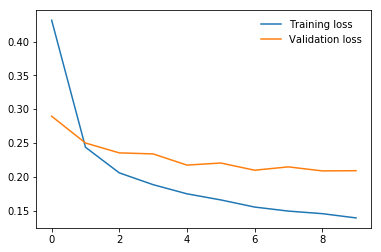

In [42]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
e =50
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

Accuracy : 94.5,  
parameters:12730

## Model 6

In [49]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,32)
        self.fc2 = nn.Linear(32,10)
        
                           
        # Dropout module with 0.2 drop probability
        #self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
       
        

        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model=Network()
print("No off parameters",sum([p.numel() for p in model.parameters()]))

No off parameters 25450


In [8]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.402..  Test Loss: 0.307..  Test Accuracy: 0.915
Epoch: 2/10..  Training Loss: 0.314..  Test Loss: 0.342..  Test Accuracy: 0.921
Epoch: 3/10..  Training Loss: 0.293..  Test Loss: 0.393..  Test Accuracy: 0.903
Epoch: 4/10..  Training Loss: 0.284..  Test Loss: 0.403..  Test Accuracy: 0.912
Epoch: 5/10..  Training Loss: 0.285..  Test Loss: 0.423..  Test Accuracy: 0.915
Epoch: 6/10..  Training Loss: 0.275..  Test Loss: 0.412..  Test Accuracy: 0.924
Epoch: 7/10..  Training Loss: 0.294..  Test Loss: 0.395..  Test Accuracy: 0.923
Epoch: 8/10..  Training Loss: 0.273..  Test Loss: 0.389..  Test Accuracy: 0.924
Epoch: 9/10..  Training Loss: 0.276..  Test Loss: 0.444..  Test Accuracy: 0.905
Epoch: 10/10..  Training Loss: 0.292..  Test Loss: 0.500..  Test Accuracy: 0.893


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  

Epoch: 1/10..  Training Loss: 0.225..  Test Loss: 0.354..  Test Accuracy: 0.923
Epoch: 2/10..  Training Loss: 0.205..  Test Loss: 0.337..  Test Accuracy: 0.926
Epoch: 3/10..  Training Loss: 0.194..  Test Loss: 0.327..  Test Accuracy: 0.929
Epoch: 4/10..  Training Loss: 0.187..  Test Loss: 0.323..  Test Accuracy: 0.930
Epoch: 5/10..  Training Loss: 0.182..  Test Loss: 0.313..  Test Accuracy: 0.933
Epoch: 6/10..  Training Loss: 0.177..  Test Loss: 0.308..  Test Accuracy: 0.933
Epoch: 7/10..  Training Loss: 0.174..  Test Loss: 0.304..  Test Accuracy: 0.932
Epoch: 8/10..  Training Loss: 0.170..  Test Loss: 0.300..  Test Accuracy: 0.934
Epoch: 9/10..  Training Loss: 0.168..  Test Loss: 0.296..  Test Accuracy: 0.935
Epoch: 10/10..  Training Loss: 0.166..  Test Loss: 0.296..  Test Accuracy: 0.935


In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 1/10..  Training Loss: 0.591..  Test Loss: 0.335..  Test Accuracy: 0.901
Epoch: 2/10..  Training Loss: 0.291..  Test Loss: 0.280..  Test Accuracy: 0.915
Epoch: 3/10..  Training Loss: 0.246..  Test Loss: 0.250..  Test Accuracy: 0.926
Epoch: 4/10..  Training Loss: 0.213..  Test Loss: 0.216..  Test Accuracy: 0.935
Epoch: 5/10..  Training Loss: 0.188..  Test Loss: 0.202..  Test Accuracy: 0.940
Epoch: 6/10..  Training Loss: 0.167..  Test Loss: 0.186..  Test Accuracy: 0.943
Epoch: 7/10..  Training Loss: 0.151..  Test Loss: 0.170..  Test Accuracy: 0.948
Epoch: 8/10..  Training Loss: 0.138..  Test Loss: 0.162..  Test Accuracy: 0.951
Epoch: 9/10..  Training Loss: 0.126..  Test Loss: 0.154..  Test Accuracy: 0.952
Epoch: 10/10..  Training Loss: 0.117..  Test Loss: 0.148..  Test Accuracy: 0.955


In [7]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/10..  Training Loss: 0.360..  Test Loss: 0.236..  Test Accuracy: 0.926
Epoch: 1/10..  Training Loss: 0.189..  Test Loss: 0.202..  Test Accuracy: 0.942
Epoch: 2/10..  Training Loss: 0.162..  Test Loss: 0.265..  Test Accuracy: 0.928
Epoch: 3/10..  Training Loss: 0.139..  Test Loss: 0.248..  Test Accuracy: 0.931
Epoch: 4/10..  Training Loss: 0.126..  Test Loss: 0.192..  Test Accuracy: 0.952
Epoch: 5/10..  Training Loss: 0.109..  Test Loss: 0.206..  Test Accuracy: 0.950
Epoch: 6/10..  Training Loss: 0.102..  Test Loss: 0.179..  Test Accuracy: 0.956
Epoch: 7/10..  Training Loss: 0.095..  Test Loss: 0.230..  Test Accuracy: 0.945
Epoch: 8/10..  Training Loss: 0.094..  Test Loss: 0.213..  Test Accuracy: 0.953
Epoch: 9/10..  Training Loss: 0.086..  Test Loss: 0.244..  Test Accuracy: 0.944


Epoch: 0/10..  Training Loss: 0.409..  Test Loss: 0.252..  Test Accuracy: 0.926
Epoch: 1/10..  Training Loss: 0.205..  Test Loss: 0.215..  Test Accuracy: 0.936
Epoch: 2/10..  Training Loss: 0.161..  Test Loss: 0.203..  Test Accuracy: 0.939
Epoch: 3/10..  Training Loss: 0.133..  Test Loss: 0.205..  Test Accuracy: 0.939
Epoch: 4/10..  Training Loss: 0.117..  Test Loss: 0.170..  Test Accuracy: 0.951
Epoch: 5/10..  Training Loss: 0.103..  Test Loss: 0.169..  Test Accuracy: 0.955
Epoch: 6/10..  Training Loss: 0.094..  Test Loss: 0.147..  Test Accuracy: 0.959
Epoch: 7/10..  Training Loss: 0.085..  Test Loss: 0.156..  Test Accuracy: 0.958
Epoch: 8/10..  Training Loss: 0.079..  Test Loss: 0.168..  Test Accuracy: 0.955
Epoch: 9/10..  Training Loss: 0.073..  Test Loss: 0.169..  Test Accuracy: 0.956


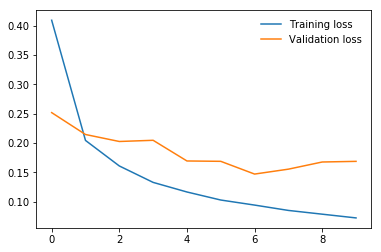

In [50]:
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

Best Accuracy : 95.6 for optim.SGD(model.parameters(), lr=0.04, momentum=0.9, nesterov=True)
No off parameters 25450

### Model 7

In [23]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,10)
                           
        # Dropout module with 0.2 drop probability
        #self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
       
        

        # output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
        
model=Network()
print("No off parameters",sum([p.numel() for p in model.parameters()]))

No off parameters 52650


In [11]:
optimizer=optim.Adam(model.parameters(),lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/10..  Training Loss: 0.458..  Test Loss: 0.406..  Test Accuracy: 0.895
Epoch: 2/10..  Training Loss: 0.329..  Test Loss: 0.450..  Test Accuracy: 0.883
Epoch: 3/10..  Training Loss: 0.317..  Test Loss: 0.369..  Test Accuracy: 0.917
Epoch: 4/10..  Training Loss: 0.297..  Test Loss: 0.403..  Test Accuracy: 0.905
Epoch: 5/10..  Training Loss: 0.283..  Test Loss: 0.348..  Test Accuracy: 0.921
Epoch: 6/10..  Training Loss: 0.293..  Test Loss: 0.381..  Test Accuracy: 0.924
Epoch: 7/10..  Training Loss: 0.287..  Test Loss: 0.372..  Test Accuracy: 0.921
Epoch: 8/10..  Training Loss: 0.260..  Test Loss: 0.364..  Test Accuracy: 0.922
Epoch: 9/10..  Training Loss: 0.263..  Test Loss: 0.460..  Test Accuracy: 0.908
Epoch: 10/10..  Training Loss: 0.268..  Test Loss: 0.380..  Test Accuracy: 0.917


In [12]:
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/10..  Training Loss: 0.441..  Test Loss: 1.054..  Test Accuracy: 0.668
Epoch: 1/10..  Training Loss: 0.652..  Test Loss: 0.764..  Test Accuracy: 0.749
Epoch: 2/10..  Training Loss: 0.666..  Test Loss: 1.629..  Test Accuracy: 0.634
Epoch: 3/10..  Training Loss: 1.673..  Test Loss: 2.159..  Test Accuracy: 0.419
Epoch: 4/10..  Training Loss: 1.279..  Test Loss: 1.805..  Test Accuracy: 0.533
Epoch: 5/10..  Training Loss: 1.327..  Test Loss: 1.818..  Test Accuracy: 0.494
Epoch: 6/10..  Training Loss: 1.212..  Test Loss: 1.449..  Test Accuracy: 0.519
Epoch: 7/10..  Training Loss: 1.028..  Test Loss: 1.347..  Test Accuracy: 0.605
Epoch: 8/10..  Training Loss: 1.086..  Test Loss: 1.455..  Test Accuracy: 0.554
Epoch: 9/10..  Training Loss: 1.118..  Test Loss: 1.363..  Test Accuracy: 0.559


In [24]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/10..  Training Loss: 0.770..  Test Loss: 0.342..  Test Accuracy: 0.900
Epoch: 1/10..  Training Loss: 0.281..  Test Loss: 0.274..  Test Accuracy: 0.917
Epoch: 2/10..  Training Loss: 0.209..  Test Loss: 0.217..  Test Accuracy: 0.935
Epoch: 3/10..  Training Loss: 0.165..  Test Loss: 0.183..  Test Accuracy: 0.949
Epoch: 4/10..  Training Loss: 0.135..  Test Loss: 0.169..  Test Accuracy: 0.949
Epoch: 5/10..  Training Loss: 0.115..  Test Loss: 0.152..  Test Accuracy: 0.956
Epoch: 6/10..  Training Loss: 0.097..  Test Loss: 0.142..  Test Accuracy: 0.957
Epoch: 7/10..  Training Loss: 0.085..  Test Loss: 0.127..  Test Accuracy: 0.962
Epoch: 8/10..  Training Loss: 0.073..  Test Loss: 0.126..  Test Accuracy: 0.965
Epoch: 9/10..  Training Loss: 0.065..  Test Loss: 0.130..  Test Accuracy: 0.962


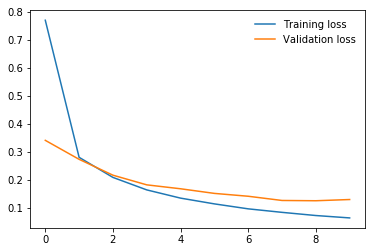

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [8]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
criterion=nn.NLLLoss()
epochs=5
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/5..  Training Loss: 0.768..  Test Loss: 0.323..  Test Accuracy: 0.904
Epoch: 1/5..  Training Loss: 0.274..  Test Loss: 0.248..  Test Accuracy: 0.927
Epoch: 2/5..  Training Loss: 0.202..  Test Loss: 0.210..  Test Accuracy: 0.939
Epoch: 3/5..  Training Loss: 0.158..  Test Loss: 0.174..  Test Accuracy: 0.949
Epoch: 4/5..  Training Loss: 0.131..  Test Loss: 0.159..  Test Accuracy: 0.953


In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.04)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]

for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels) # predicted,actual.Caluclating Train Loss
        loss.backward() #backward propogation
        optimizer.step() #optimize weights and bias
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) #caluclating test loss
                ps=torch.exp(log_ps) 
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))) 

Epoch: 0/10..  Training Loss: 1.160..  Test Loss: 0.449..  Test Accuracy: 0.871
Epoch: 1/10..  Training Loss: 0.376..  Test Loss: 0.333..  Test Accuracy: 0.904
Epoch: 2/10..  Training Loss: 0.303..  Test Loss: 0.290..  Test Accuracy: 0.915
Epoch: 3/10..  Training Loss: 0.262..  Test Loss: 0.261..  Test Accuracy: 0.924
Epoch: 4/10..  Training Loss: 0.231..  Test Loss: 0.246..  Test Accuracy: 0.927
Epoch: 5/10..  Training Loss: 0.202..  Test Loss: 0.219..  Test Accuracy: 0.935
Epoch: 6/10..  Training Loss: 0.180..  Test Loss: 0.199..  Test Accuracy: 0.943
Epoch: 7/10..  Training Loss: 0.160..  Test Loss: 0.182..  Test Accuracy: 0.947
Epoch: 8/10..  Training Loss: 0.145..  Test Loss: 0.175..  Test Accuracy: 0.950
Epoch: 9/10..  Training Loss: 0.133..  Test Loss: 0.170..  Test Accuracy: 0.951


Best Accuracy : 97 , no of parameters = 52650

## Observations:

#### 1. Least no of parameters :9550 , Accuracy :93.2%

#### 2. Max Accuracy : 97.3%, Parameters: 110816

#### 3. Max Parameters: 111146, Accuracy :0.96